# Data Recording Sales 

## Data Exploration & Cleaning
The first part of any data analysis or predictive modeling task is an initial exploration of the data. Even if you collected the data yourself and you already have a list of questions in mind that you want to answer, it is important to explore the data before doing any serious analysis, since oddities in the data can cause bugs and muddle your results. Before exploring deeper questions, you have to answer many simpler ones about the form and quality of data. That said, it is important to go into your initial data exploration with a big picture question in mind since the goal of your analysis should inform how you prepare the data.

In [35]:

# Load in some packages
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

dr_sales_df = pd.read_excel(r"C:\Users\jki\Downloads\Data Recording Sales Dataset.xlsx")
.head(6)

,Date,Party,Voucher Type,Voucher No.,GSTIN/UIN,Quantity,Value,Gross Total
0,2017-07-07 00:00:00,Bhavin Jani,SALES,d4a8c69b845073bd,22f9741467a02b6530,136.0,53200.0,65796.0
1,2017-07-07 00:00:00,Jayesh Rege,SALES,40549be5cab3e7a9,23c8d6101b1869f123,24.0,24600.0,31488.0
2,2017-07-07 00:00:00,Farhan Zachariah,SALES,fc4e8e9ba6911989,24f73a863eae7cf9d9,155.0,68660.0,82839.0
3,2017-07-08 00:00:00,Farhan Zachariah,SALES,83c11df1ada57622,24f73a863eae7cf9d9,319.0,164475.0,194860.5
4,2017-07-10 00:00:00,Kabir Raj,SALES,e85983fe05035e77,08b8060280e794624c,110.0,26000.0,31100.0
5,2017-07-12 00:00:00,Aradhya Dhillon,SALES,6fc9e94f41df3696,24b6a7b12f0e96b7b0,2.0,2300.0,2944.0


In [36]:
dr_sales_df.describe()

,Quantity,Value,Gross Total
count,3840.00000,8269.00000,3865.000000
mean,89.95651,19597.45428,28748.707710
std,225.38996,30552.11632,41124.986124
min,1.00000,-145591.00000,260.000000
25%,10.00000,2800.00000,6897.000000
50%,25.00000,10875.00000,15753.000000
75%,75.00000,24750.00000,32745.000000
max,5100.00000,435000.00000,440730.000000


In [37]:
# lets remove missing values

missing_values = dr_sales_df.isna().sum()
print(missing_values)

Date            3573
Party              0
Voucher Type    4404
Voucher No.     4404
GSTIN/UIN       4519
Quantity        4429
Value              0
Gross Total     4404
dtype: int64


In [41]:
# lets remove missing values
dr_sales_df.dropna(subset=['Date'],inplace=True)
dr_sales_df.dropna(subset=['Voucher Type'],inplace=True)
dr_sales_df.dropna(subset=['Voucher No.'],inplace=True)
dr_sales_df.dropna(subset=['GSTIN/UIN'],inplace=True)
dr_sales_df.dropna(subset=['Quantity'],inplace=True)
dr_sales_df.dropna(subset=['Gross Total'],inplace=True)
# lets remove missing values

missing_values = dr_sales_df.isna().sum()
print(missing_values)

Date            0
Party           0
Voucher Type    0
Voucher No.     0
GSTIN/UIN       0
Quantity        0
Value           0
Gross Total     0
dtype: int64


In [42]:
# lets see if we have negative values
dr_sales_df.describe()

,Quantity,Value,Gross Total
count,3725.000000,3725.000000,3725.000000
mean,91.495302,24869.369718,29434.818174
std,227.741967,35180.869961,41551.999738
min,1.000000,240.000000,383.000000
25%,10.000000,6175.000000,7316.000000
50%,27.000000,13775.000000,16284.000000
75%,76.000000,28125.000000,33247.000000
max,5100.000000,373500.000000,440730.000000


In [43]:
# lets have a look at the data types
dr_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3725 entries, 0 to 3864
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3725 non-null   object 
 1   Party         3725 non-null   object 
 2   Voucher Type  3725 non-null   object 
 3   Voucher No.   3725 non-null   object 
 4   GSTIN/UIN     3725 non-null   object 
 5   Quantity      3725 non-null   float64
 6   Value         3725 non-null   float64
 7   Gross Total   3725 non-null   float64
dtypes: float64(3), object(5)
memory usage: 261.9+ KB


In [47]:
# lets change the date data type
dr_sales_df['Date'] = pd.to_datetime(dr_sales_df['Date'])
dr_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3725 entries, 0 to 3864
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3725 non-null   datetime64[ns]
 1   Party         3725 non-null   object        
 2   Voucher Type  3725 non-null   object        
 3   Voucher No.   3725 non-null   object        
 4   GSTIN/UIN     3725 non-null   object        
 5   Quantity      3725 non-null   float64       
 6   Value         3725 non-null   float64       
 7   Gross Total   3725 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 261.9+ KB


In [49]:
# Creating a new variable can be as simple as taking one variable and adding, multiplying or dividing by another. Let's create a new variable, Month, from 'Order Date':



dr_sales_df['Month'] = dr_sales_df['Date'].dt.month
dr_sales_df['Year'] = dr_sales_df['Date'].dt.year
dr_sales_df['Hour'] = dr_sales_df['Date'].dt.hour
dr_sales_df['Month'].info()
dr_sales_df['Year'].info()
dr_sales_df['Hour'].info()

<class 'pandas.core.series.Series'>
Int64Index: 3725 entries, 0 to 3864
Series name: Month
Non-Null Count  Dtype
--------------  -----
3725 non-null   int64
dtypes: int64(1)
memory usage: 58.2 KB
<class 'pandas.core.series.Series'>
Int64Index: 3725 entries, 0 to 3864
Series name: Year
Non-Null Count  Dtype
--------------  -----
3725 non-null   int64
dtypes: int64(1)
memory usage: 58.2 KB
<class 'pandas.core.series.Series'>
Int64Index: 3725 entries, 0 to 3864
Series name: Hour
Non-Null Count  Dtype
--------------  -----
3725 non-null   int64
dtypes: int64(1)
memory usage: 58.2 KB


In [50]:
dr_sales_df

,Date,Party,Voucher Type,Voucher No.,GSTIN/UIN,Quantity,Value,Gross Total,Month,Year,Hour
0,2017-07-07,Bhavin Jani,SALES,d4a8c69b845073bd,22f9741467a02b6530,136.0,53200.0,65796.0,7,2017,0
1,2017-07-07,Jayesh Rege,SALES,40549be5cab3e7a9,23c8d6101b1869f123,24.0,24600.0,31488.0,7,2017,0
2,2017-07-07,Farhan Zachariah,SALES,fc4e8e9ba6911989,24f73a863eae7cf9d9,155.0,68660.0,82839.0,7,2017,0
3,2017-07-08,Farhan Zachariah,SALES,83c11df1ada57622,24f73a863eae7cf9d9,319.0,164475.0,194860.5,7,2017,0
4,2017-07-10,Kabir Raj,SALES,e85983fe05035e77,08b8060280e794624c,110.0,26000.0,31100.0,7,2017,0
...,...,...,...,...,...,...,...,...,...,...,...
3859,2020-02-12,Fateh Bail,SALES,ac2065c72b626036,275bf74a5d2ba5c54c,250.0,39750.0,46905.0,2,2020,0
3860,2020-02-12,Yakshit Deshpande,SALES,480ef6acccc84667,33f31fc6dd17c22ec8,10.0,23625.0,27878.0,2,2020,0
3861,2020-02-12,Dhanuk Choudhury,SALES,bdaec581e00b7f73,22e667148910ee1d8a,28.0,10750.0,12685.0,2,2020,0
3863,2020-02-12,Ryan Dass,SALES,ee62298a2145d1f9,08cf9f5c5e6c7e499c,95.0,10678.0,12600.0,2,2020,0


## 1. What was the best month for sales? How much was earned that month?

In [52]:
# Load in some packages
import calendar
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

warnings.filterwarnings("ignore")

# 1. What was the best month for sales? How much was earned that month?

# Replace NaN or inf values in the 'Month' column with a default value (e.g., 0)
dr_sales_df['Month'] = dr_sales_df['Month'].fillna(0).astype(int)

# Convert month numbers to abbreviated month names
dr_sales_df['Month Name'] = dr_sales_df['Month'].apply(lambda x: calendar.month_abbr[x])

# Group by month and calculate total sales for each month
sales_by_month = dr_sales_df.groupby('Month Name').sum()['Gross Total']

# Find the best month for sales and the corresponding earnings
best_month = sales_by_month.idxmax()
earnings_for_best_month = sales_by_month.max()

print(f"The best month for sales was {best_month} with earnings of ${earnings_for_best_month:,.2f}")

The best month for sales was Oct with earnings of $15,666,515.50


In [54]:
unique_Months = dr_sales_df['Month'].apply(lambda x: calendar.month_abbr[x]).unique() # Take all 12 months' names
Sales_by_month = dr_sales_df.groupby('Month').sum()['Gross Total'] # Take the highest number o

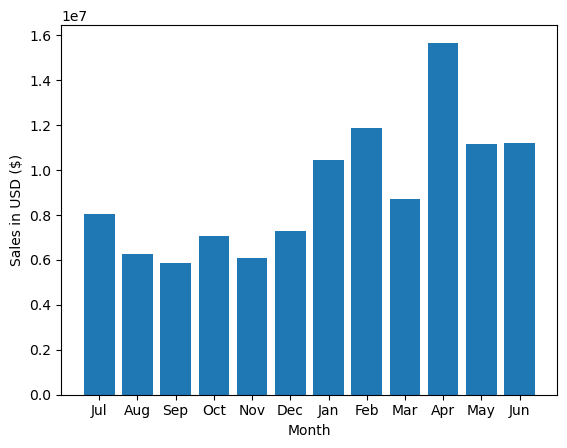

In [59]:
# Plot the highest number of sales for each month
plt.bar(unique_Months, Sales_by_month)
plt.xticks(unique_Months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()